In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress
import seaborn as sns
import numpy as np

In [82]:
# File paths
fare_path = "csv/Istanbulkart_Fare_Avg.csv"
fuel_path = "csv/fuel_price_data.csv"
passenger_path = "csv/passenger_data.csv"
car_sales_path = "csv/car_sales_data.csv"

In [83]:
# Read data
df_fare = pd.read_csv(fare_path)
df_fuel = pd.read_csv(fuel_path)
df_passenger = pd.read_csv(passenger_path, sep=';')
df_car_sales = pd.read_csv(car_sales_path)

In [84]:
# Clean passenger data
df_passenger['passenger'] = df_passenger['passenger'].str.replace('.', '', regex=False).astype(int)

In [85]:
# Standardize column names
df_fuel["Year"] = df_fuel["YIL"].astype(int)
df_fuel = df_fuel.drop(columns=["YIL"])
df_car_sales["Year"] = df_car_sales["Year"].astype(int)
df_passenger["Year"] = df_passenger["Year"].astype(int)
df_fare["Year"] = df_fare["Year"].astype(int)

In [86]:
# Merge all data
df_merged = df_fare.merge(df_fuel, on="Year") \
                   .merge(df_passenger, on="Year") \
                   .merge(df_car_sales, on="Year")

In [87]:
# Correlation and regression analysis
fuel_prices = df_merged["KURŞUNSUZ BENZİN (TL/LT)"]
metro_fare = df_merged["Full Istanbulkart"]
ridership = df_merged["passenger"]
car_sales = df_merged["Total"]

In [88]:
corr1, p1 = pearsonr(fuel_prices, ridership)
reg1 = linregress(fuel_prices, ridership)

In [89]:
corr2, p2 = pearsonr(metro_fare, ridership)
reg2 = linregress(metro_fare, ridership)

In [90]:
corr3, p3 = pearsonr(car_sales, ridership)
reg3 = linregress(car_sales, ridership)

Visualizations

1. Scatter plots with regression lines

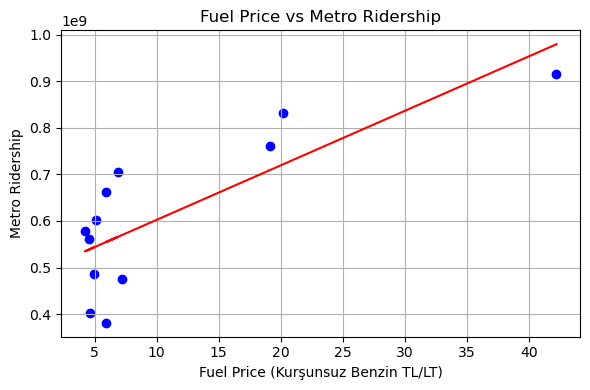

In [91]:
plt.figure(figsize=(6, 4))
plt.scatter(fuel_prices, ridership, color='blue')
plt.plot(fuel_prices, reg1.intercept + reg1.slope * fuel_prices, color='red')
plt.xlabel("Fuel Price (Kurşunsuz Benzin TL/LT)")
plt.ylabel("Metro Ridership")
plt.title("Fuel Price vs Metro Ridership")
plt.grid(True)
plt.tight_layout()
plt.show()

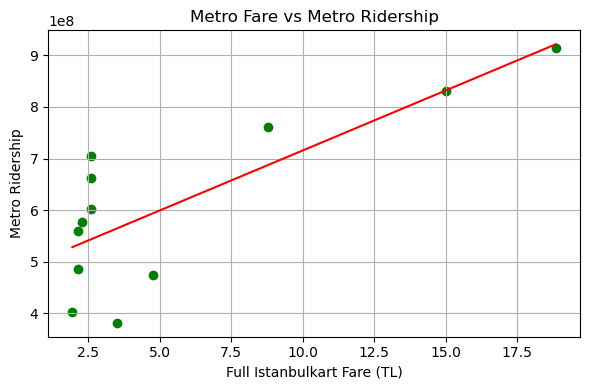

In [92]:
plt.figure(figsize=(6, 4))
plt.scatter(metro_fare, ridership, color='green')
plt.plot(metro_fare, reg2.intercept + reg2.slope * metro_fare, color='red')
plt.xlabel("Full Istanbulkart Fare (TL)")
plt.ylabel("Metro Ridership")
plt.title("Metro Fare vs Metro Ridership")
plt.grid(True)
plt.tight_layout()
plt.show()

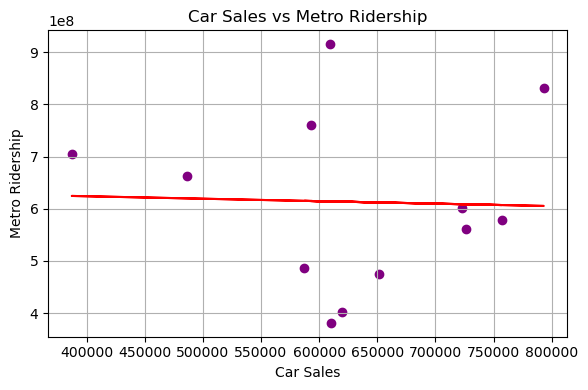

In [93]:
plt.figure(figsize=(6, 4))
plt.scatter(car_sales, ridership, color='purple')
plt.plot(car_sales, reg3.intercept + reg3.slope * car_sales, color='red')
plt.xlabel("Car Sales")
plt.ylabel("Metro Ridership")
plt.title("Car Sales vs Metro Ridership")
plt.grid(True)
plt.tight_layout()
plt.show()

2. Heatmap

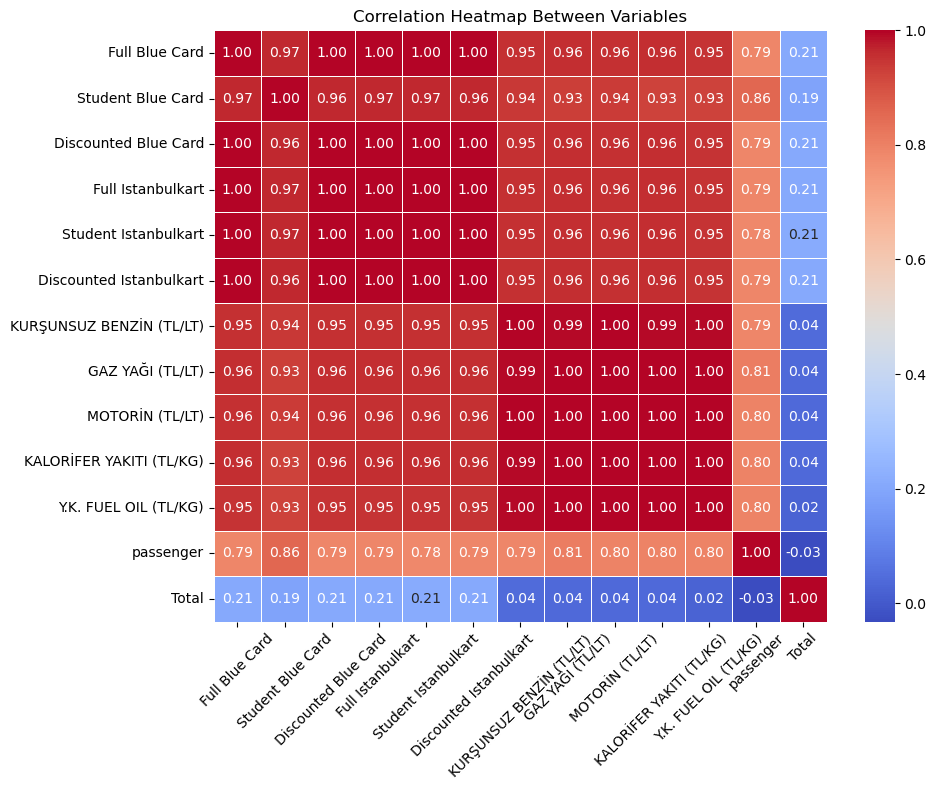

In [94]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_merged.drop(columns=["Year"]).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap Between Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Time series with dual y-axis

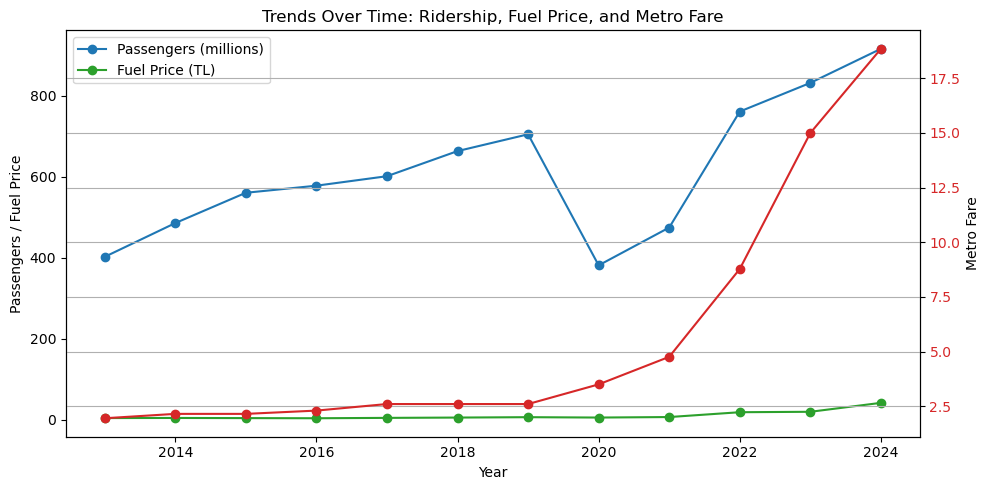

In [95]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(df_merged['Year'], df_merged['passenger'] / 1e6, color='tab:blue', marker='o', label='Passengers (millions)')
ax1.plot(df_merged['Year'], df_merged['KURŞUNSUZ BENZİN (TL/LT)'], color='tab:green', marker='o', label='Fuel Price (TL)')
ax1.set_xlabel("Year")
ax1.set_ylabel("Passengers / Fuel Price")
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(df_merged['Year'], df_merged['Full Istanbulkart'], color='tab:red', marker='o', label='Metro Fare (TL)')
ax2.set_ylabel("Metro Fare")
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.title("Trends Over Time: Ridership, Fuel Price, and Metro Fare")
fig.tight_layout()
plt.grid(True)
plt.show()

Hypothesis Testing 

In [96]:
# H01 vs H11: Fuel Price vs Metro Ridership
h1_corr, h1_p = pearsonr(df_merged["KURŞUNSUZ BENZİN (TL/LT)"], df_merged["passenger"])
h1_reg = linregress(df_merged["KURŞUNSUZ BENZİN (TL/LT)"], df_merged["passenger"])

In [97]:
# H02 vs H12: Metro Fare vs Metro Ridership
h2_corr, h2_p = pearsonr(df_merged["Full Istanbulkart"], df_merged["passenger"])
h2_reg = linregress(df_merged["Full Istanbulkart"], df_merged["passenger"])

In [98]:
# H03 vs H13: Vehicle Sales vs Metro Ridership
h3_corr, h3_p = pearsonr(df_merged["Total"], df_merged["passenger"])
h3_reg = linregress(df_merged["Total"], df_merged["passenger"])

In [99]:
# Summary of results
hypothesis_results = {
    "Hypothesis 1 (Fuel Price -->  Ridership)": {
        "Correlation Coefficient": round(h1_corr, 3),
        "P-Value": round(h1_p, 4),
        "Regression Slope": round(h1_reg.slope, 2),
        "Direction": "Positive" if h1_reg.slope > 0 else "Negative",
        "Conclusion": "Reject H01 (Significant)" if h1_p < 0.05 and h1_reg.slope > 0 else "Fail to Reject H01"
    },
    "Hypothesis 2 (Metro Fare -->  Ridership)": {
        "Correlation Coefficient": round(h2_corr, 3),
        "P-Value": round(h2_p, 4),
        "Regression Slope": round(h2_reg.slope, 2),
        "Direction": "Negative" if h2_reg.slope < 0 else "Positive",
        "Conclusion": "Reject H02 (Significant)" if h2_p < 0.05 and h2_reg.slope < 0 else "Fail to Reject H02"
    },
    "Hypothesis 3 (Vehicle Sales --> Ridership)": {
        "Correlation Coefficient": round(h3_corr, 3),
        "P-Value": round(h3_p, 4),
        "Regression Slope": round(h3_reg.slope, 2),
        "Direction": "Negative" if h3_reg.slope < 0 else "Positive",
        "Conclusion": "Reject H03 (Significant)" if h3_p < 0.05 and h3_reg.slope < 0 else "Fail to Reject H03"
    }
}

In [100]:
for hypothesis, results in hypothesis_results.items():
    print(f"\n{hypothesis}:")
    print(f"  Pearson's r: {results['Correlation Coefficient']}")
    print(f"  P-value: {results['P-Value']}")
    print(f"  Regression Slope: {results['Regression Slope']}")
    print(f"  Relationship Direction: {results['Direction']}")
    print(f"  Conclusion: {results['Conclusion']}")
print("\nNote: Significance level = 0.05")


Hypothesis 1 (Fuel Price -->  Ridership):
  Pearson's r: 0.789
  P-value: 0.0023
  Regression Slope: 11709814.91
  Relationship Direction: Positive
  Conclusion: Reject H01 (Significant)

Hypothesis 2 (Metro Fare -->  Ridership):
  Pearson's r: 0.788
  P-value: 0.0023
  Regression Slope: 23288328.18
  Relationship Direction: Positive
  Conclusion: Fail to Reject H02

Hypothesis 3 (Vehicle Sales --> Ridership):
  Pearson's r: -0.032
  P-value: 0.9206
  Regression Slope: -47.23
  Relationship Direction: Negative
  Conclusion: Fail to Reject H03

Note: Significance level = 0.05
